The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [3]:
#!pip install datascience
from datascience import *
import numpy as np

from IPython.display import display, Math, Latex

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chapter 16: Inference for Regression

Thus far, our analysis of the relation between variables has been purely descriptive. We know how to find the best straight line to draw through a scatter plot. The line is the best in the sense that it has the smallest mean squared error of estimation among all straight lines.

* What if our data were only a sample from a larger population? 
* If in the sample we found a linear relation between the two variables, would the same be true for the population? 
* Would it be exactly the same linear relation? 
* Could we predict the response of a new individual who is not in our sample?

If we believe that a sample reflects the underlying population we can infer and predict information about the underlying population.

Our simulations show that if the regression model holds and the sample size is large, then the regression line is likely to be close to the true line. This allows us to estimate the slope of the true line.

We will use our familiar sample of mothers and their newborn babies to develop a method of estimating the slope of the true line.

In [9]:
baby = Table.read_table('baby.csv')

In [12]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

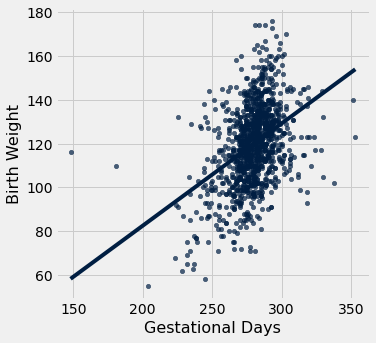

In [18]:
baby.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [13]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.4075427933888511

In [14]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.4665568769492152

But had the scatter plot come out differently, the regression line would have been different and might have had a different slope. How do we figure out how different the slope might have been?

We need another sample of points, so that we can draw the regression line through the new scatter plot and find its slope. But from where will get another sample?

You have guessed it – we will bootstrap our original sample. That will give us a bootstrapped scatter plot, through which we can draw a regression line.